# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 10., 20., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

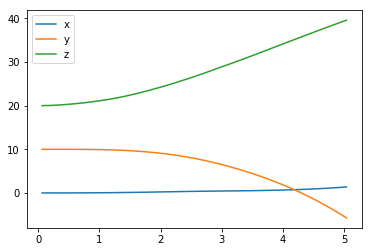

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

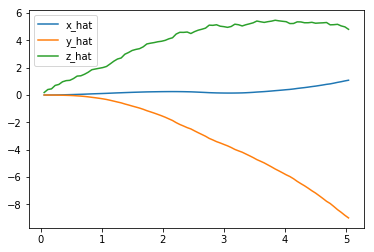

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

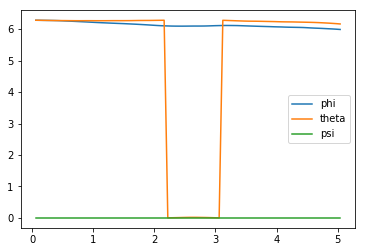

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

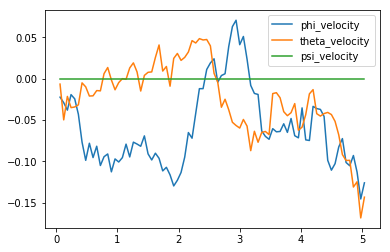

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

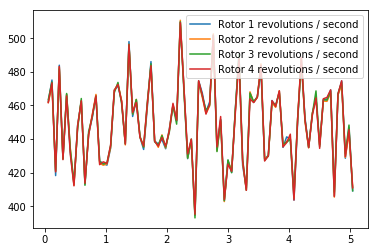

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  1.3772356   -5.72855546  39.58653445   5.99008375   6.16508841   0.        ]
[ 1.08186785 -8.98732454  4.80495105]
[-0.12613046 -0.1434785   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.036 (best =  -0.726), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
from agents.agent import DDPG_Agent

## TODO: Train your agent here.
runtime = 10.  
num_episodes = 1000
#num_episodes = 200
init_pose = np.array([0., 0., 10., 0., 0., 0.])
target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG_Agent(task) 

log_file = 'log_DDPG_Agent.csv'
log_labels = ['Episode', 'Score', 'Best', 'Total reward', 'End position']
with open(log_file, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(log_labels)

    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        total_reward = 0
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            #print("next_state={}, reward={}, done={}".format(next_state, reward, done))
            total_reward += reward
            agent.step(next_state, reward, done)
            state = next_state
            if done:
                print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), t_reward= {}, height = {}".format(
                    i_episode, agent.score, agent.best_score, total_reward, task.sim.pose[2]), end="")  # [debug]
                #print("End position = {}".format(task.sim.pose), end="\n")
                writer.writerow([i_episode, agent.score, agent.best_score, total_reward, task.sim.pose])
                break
        sys.stdout.flush()

Using TensorFlow backend.


Episode = 1000, score =  17.798 (best =  21.322), t_reward= 1495.0098507846558, height = 82.294248679652036

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

min=-7.46486445311, max=21.3216459145


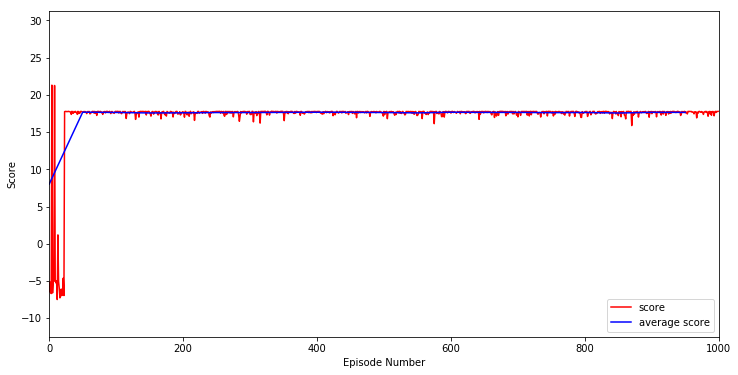

In [47]:
## TODO: Plot the rewards.
log_plot_file = 'log_DDPG_Agent.csv'

log_score = []
end_state = []
with open(log_plot_file) as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        log_score.append(row[1])
        end_state.append(row[4])

# Remove the header and cast string into float64
log_score = np.asarray(log_score[1:], dtype=np.float64)
# Get average scores over 50 episodes
log_mean_score = np.asarray([np.mean(a) for a in log_score.reshape(int(len(log_score)/50), 50)])

# Plot scores
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_ylim(np.min(log_score)-5, np.max(log_score)+10)
#ax.set_ylim(-10, 30)
print("min={}, max={}".format(np.min(log_score), np.max(log_score)))
ax.set_xlim(0, len(log_score))
plt.plot(range(len(log_score)), log_score, 'r-', label='score')
plt.plot(range(0, len(log_score), 50), log_mean_score, 'b-', label='average score')
plt.xlabel('Episode Number')
plt.ylabel('Score')
plt.legend(loc=4)
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

In this project, I decided to teach the agent to take off and fly.

First, I tried to make the simlator just go up. I specified the reward function so that the task returns the difference between the current position and the previous position of the simlator with respect to the z axis. The reward the agent obtains at each step is the amount of the distance how much it goes up from the previous step (I commented out this line in task.py).

After some runs, I thought the agent had learned to fly upwards anyway. Then I decided to make it fly around the height of the target. I changed the reward function so that the agent acquires more rewards as it gets closer to the target's height whereas it gets less rewards as it goes further away from the target. 
        
```python
    dist_tar_sim = self.target_pos[2] - self.sim.pose[2]
    dist_tar_init  = self.target_pos[2] - self.init_pose[2]
    reward_sqr = -(dist_tar_sim**2) + (dist_tar_init**2)        
    reward = np.sqrt(reward_sqr)*0.1 if reward_sqr >= 0 else -np.sqrt(abs(reward_sqr))*0.1
```
   
In this task, the height where the simlator takes off is 10, and the target height is 100.

The derivative of this reward function is larger when the position of the simulator is further from the target. I expected that it would help the agent to recognize the right direction especially at its takeoff. I wanted to give a relatively significant reward for the agent's small attempt to take off, because I thought the quadcopter needs a lot of effort for takeoff and I wanted to encourage it. When it starts to fall off from the initial position, the negative reward increases significantly.  The constant 0.1 is multiplied in order to adjust the range of the reward value.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

To implement the agent's algorithm, I made use of the code provided.  This algorithm is called DDPG(Deep Deterministic Policy Gradients). DDPG is a model-free, off-policy actor-critic algorithm, and is invented to solve the problem which has high dimensional, continuous action spaces. I decided to use this algorithm here because the states and actions in this project are continuous parameters.

I specified the hyperparameters, mu, theta, sigma, gamma and tau as below:

 - mu = 0
 - theta = 0.7
 - sigma = 0.85
 - gamma = 0.99
 - tau = 0.04
 
Mu, theta, and sigma are related to the noise that is added to the action the actor has chosen. Tau is a parameter for the soft update. I tried out some values between 0.1 and 0.9 for theta and sigma, and 0.001 to 0.4 for tau, and finally I chose these values.

Neural networks for the actor model has an input layer, where the input shape is the same as the state spaces. It is followed by two fully connected layers with 128 and 64 output space respectively. Activation function for both layers is ReLU. The final layer outputs corresponding actions. The output shape is the same as the action spaces. Activation function is sigmoid. For the critic model, neural networks have two input layers. The input layer for states is followed by two fully connected layers that have 128 and 64 output space respectively. Activation function is ReLU. The other input layer that takes in actions is followed by the series of four fully connected layers. They have 64 output spaces each, with ReLU activation function. Two outputs from these layers are combined, where ReLU activation function is applied. The final layer outputs Q value that corresponds to the state-action pair. 

The agent's algorithm has a replay buffer. This buffer stores past experiences. At each time step the agent randomly selects 64 sets from the buffer, and use them to update the actor's policy and the critics's Q value.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The plot above shows the learning curve of the agent. The red line shows the score of each episode, and the blue line represents the average score over every 50 episodes.

From this plot, this problem looked easy for the agent to learn. In its very early stage, the score showed the dynamic up-and-down swings but mainly hovered around some negative values, then suddenly soared up. The moment came earlier than the 50th episode. After that, the agent generally kept that performance. Although there were still some small up and down, the agent's performance continued to be quite stable until the end. Actually I have run several trainings on this agent, and the learning curves were always discrete like this (but the timing of the improvement was different), rather than a constant gradual curve.

At the later stage of the training, the quadcopter constantly flew. It looks like the agent has learned what it had to do. However, the simlator's end position at each episode was always lower than the target's height. I suppose the reward function could be improved to solve this problem.

For additional information, I plotted the simulator's height at the end of each episode below. This shows that the simlator reached mostly around 60 to 80.

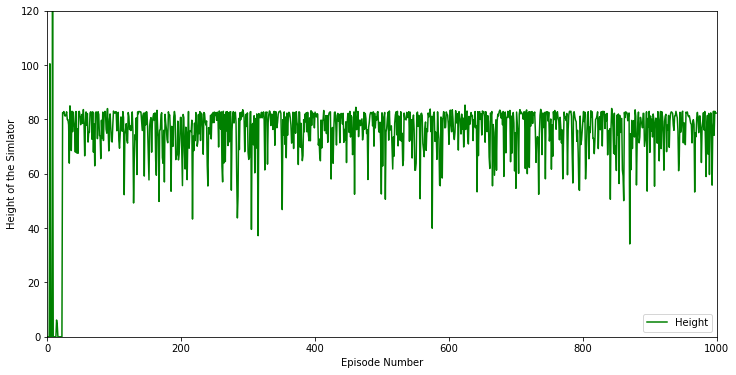

In [48]:
# Remove the header and cast string into float64
end_state_list = list(end_state[1:])
end_height_str = [s[1:-1].split()[2] for s in end_state_list]
end_height = np.asarray(end_height_str, dtype=np.float64)

# Plot simlator's height
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_ylim(0, 120)
ax.set_xlim(0, len(end_height))
plt.plot(range(len(end_height)), end_height, 'g-', label='Height')
plt.xlabel('Episode Number')
plt.ylabel('Height of the Simlator')
plt.legend(loc=4)
plt.show()

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

On the whole, this project was really challenging for me. I had no idea where to start. At first I thought that I had to specify a complex reward function, then I got stuck. Provided codes for agent's algorithm helped me a lot, but still I got confused when the agent only kept falling off. I changed my point of view and defined an simple reward function as I mentioned in Question 1, then I concentrated on improving the agent. When I reached the point where I was sure that the agent was working, I improved my reward function.

One of the most difficult part for me was how to sustain the agent's random actions. I wanted the agent to explore more because it tended to be stuck in a certain action once it experienced that action in a series of episodes. I guessed that the agent needed to experience some success anyway, otherwise it missed the opportunity to learn the desirable action and it would never learn. I tried changing the values of hyperparameters, especially theta, sigma, and tau, to accelerate random actions, but to the extent it does not ruin the policy that was built from its successful experiences. I am not sure my attempt worked.

Throughout this project, I was really impressed by the agent's behavior. It sometimes learned very quickly, and performed as I expected. Other times it behaved just like it did not have the ability to fly. It even seemed as if the quadcopter 'forgot' how to fly when it kept falling off after it successfully flew in consecutive episodes. From my observation, I think what kind of experiences the agent encounterd in the early stage of learning can make a big impact on the result. I also guess that the initial weights that are randomly set in the agent's neural networks might affect which way the learning will end with. Ideally, the agent should eventually learn proper actions through the learning process regardless of its initial experiences or initial weights. My algorithm will need further improvement to make it possible. 

I barely implemented the agent's algorithm using the code provided by udacity, and I do not think I fully understand what it is doing. This project was tough for me, but I am really glad that I have learned a lot of exciting, fascinating things.
